### problem defination
### Given iris dataset as a analyst you need to predict which type of iris flow is ( classifier ) based on four properties (variables) sepal.length	, sepal.width , 	petal.length, 	petal.width
### types are     1) Setosa        2) Versicolor    3) Virginica     

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [52]:
# import some data to play with
iris = pd.read_csv('iris.csv')

In [53]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [54]:
iris['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [55]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
#Complete Iris dataset 
label_encoder = preprocessing.LabelEncoder() 
iris['variety']= label_encoder.fit_transform(iris['variety']) 
# as y variable (dependent variable is of cateogory type ) we use label_encoder to convert from object to numeric 
# if it was x variable we can use one hot encoding

In [57]:
iris['variety'].value_counts()

0    50
1    50
2    50
Name: variety, dtype: int64

In [60]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [61]:
x=iris.iloc[:,0:4]
y=iris['variety']

In [62]:
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int32

In [64]:
iris['variety'].unique()

array([0, 1, 2])

In [65]:
iris.variety.value_counts()

0    50
1    50
2    50
Name: variety, dtype: int64

In [66]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [67]:
colnames = list(iris.columns)
colnames

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [68]:
# Splitting data into training and testing data set
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [69]:
x_train

,sepal.length,sepal.width,petal.length,petal.width
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [70]:
y_train

62    1
23    0
26    0
48    0
2     0
     ..
71    1
12    0
50    1
7     0
70    1
Name: variety, Length: 120, dtype: int32

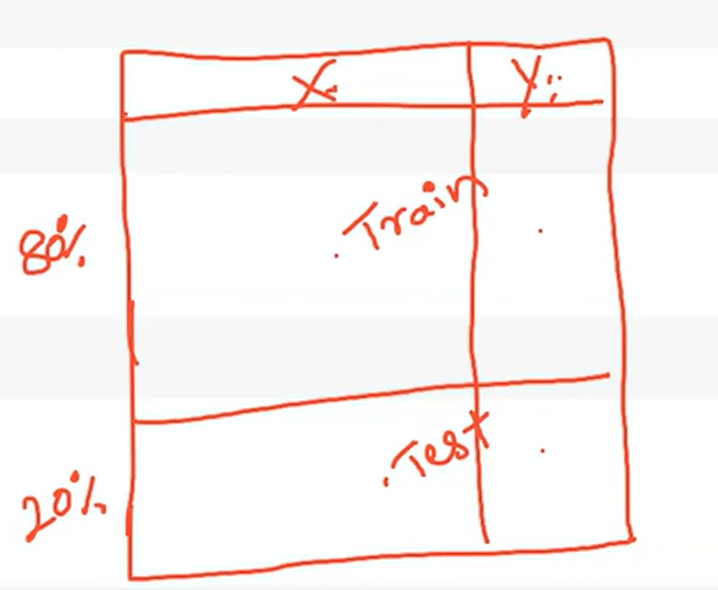

### Building Decision Tree Classifier using Entropy Criteria

In [71]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [72]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

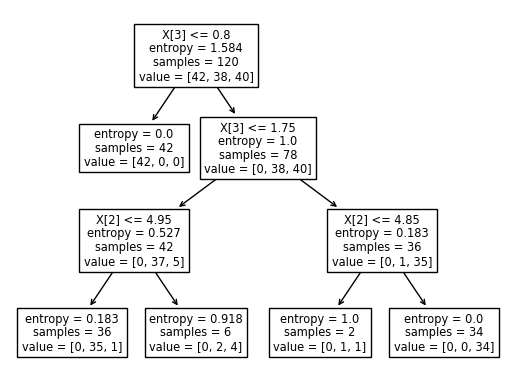

In [19]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [20]:
y_train.value_counts().keys()

Int64Index([0, 2, 1], dtype='int64')

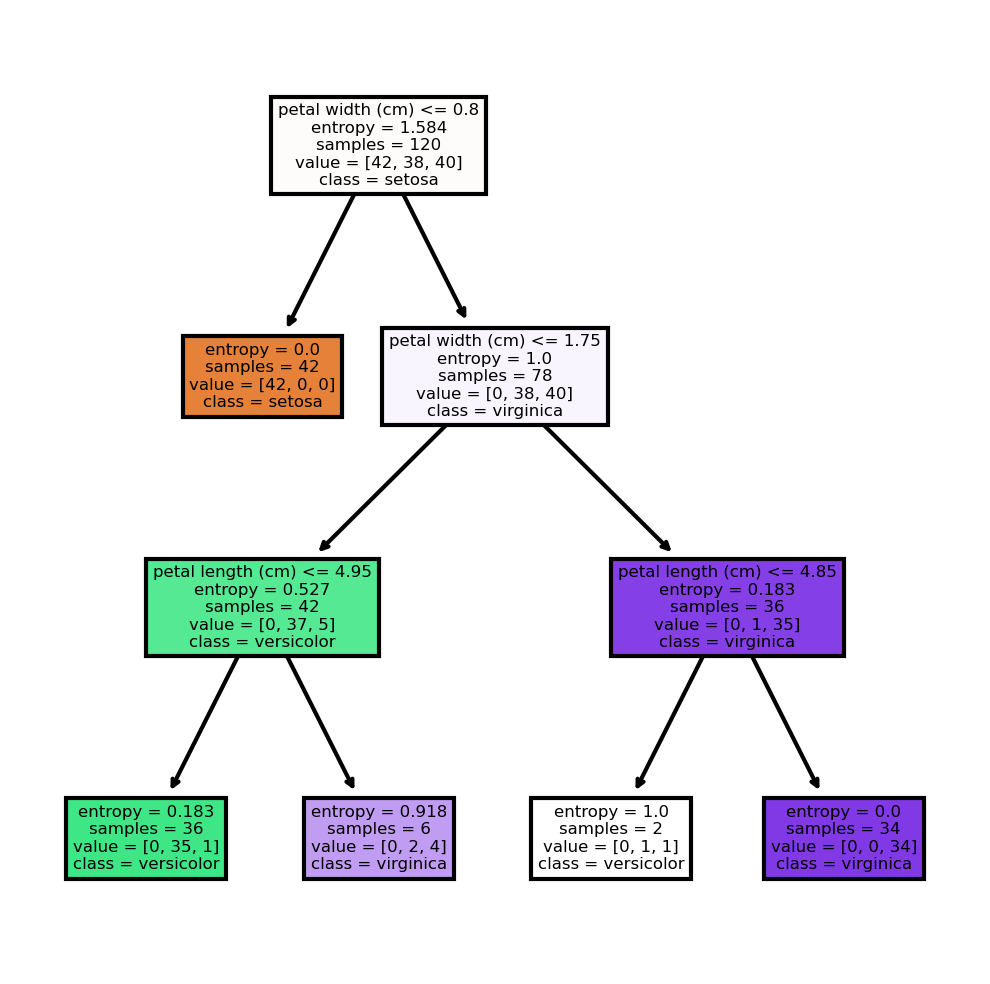

In [21]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'] #.columns
cn=['setosa', 'versicolor', 'virginica']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### looking at decision tree, in root node entropy is 1.58, in further node it is decreasing to 0.0 and 1.0 ,
### as entropy decreases, information gain increases

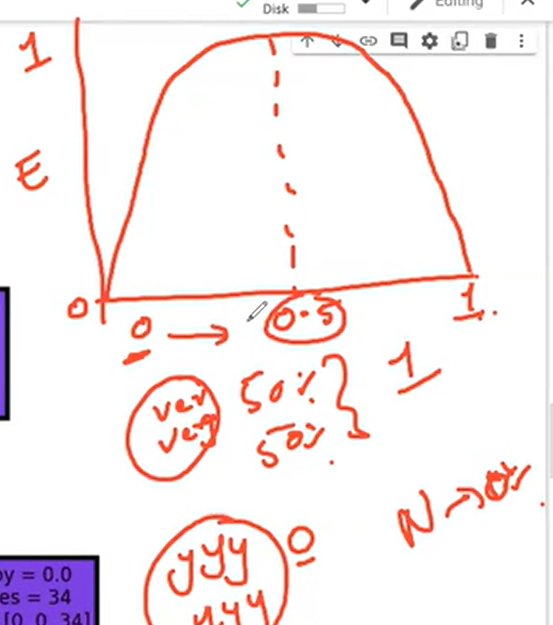

### Entropy will be highest when  , we have class of equal quantity, and if only one type of class
### means pure region, then entropy will be 0

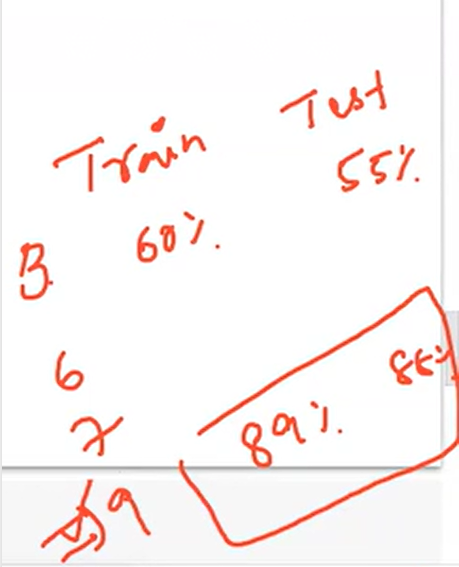

In [22]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    13
2     9
0     8
dtype: int64

In [23]:
y_test.value_counts()

1    12
2    10
0     8
Name: variety, dtype: int64

In [24]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [25]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
variety,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [26]:
# Accuracy 
np.mean(preds==y_test)

0.9666666666666667

In [27]:
y_test[127:]

Series([], Name: variety, dtype: int32)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [28]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [29]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

In [73]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [75]:
# import some data to play with
iris = pd.read_csv('iris.csv')


In [76]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [78]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
#Find the accuracy
model.score(X_test,y_test)

0.8570506663465002